In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
diabetes_df = pd.read_csv("../assets/diabetes_prediction_dataset.csv")
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
print(diabetes_df.shape)
diabetes_df.info()

(100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
diabetes_df.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# putting the categorical feature next to each other, and the numerical features next to each other

categorical_cols = diabetes_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = diabetes_df.select_dtypes(include=['number']).columns.tolist()

# Concatenate the lists of columns in the desired order
new_order = categorical_cols + numerical_cols

# Reorder the DataFrame
diabetes_df = diabetes_df[new_order]

diabetes_df.head()

,gender,smoking_history,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,never,80.0,0,1,25.19,6.6,140,0
1,Female,No Info,54.0,0,0,27.32,6.6,80,0
2,Male,never,28.0,0,0,27.32,5.7,158,0
3,Female,current,36.0,0,0,23.45,5.0,155,0
4,Male,current,76.0,1,1,20.14,4.8,155,0


In [ ]:
diabetes_df.isnull().sum()

gender                 0
smoking_history        0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
duplicates = diabetes_df.duplicated()
diabetes_df = diabetes_df.drop_duplicates()

In [ ]:
###feature engineering some new features
# diabetes_df["bmi_age_ratio"] = diabetes_df["bmi"] / diabetes_df["age"]
# diabetes_df["age_glucose_level_interaction"] = diabetes_df["age"] * diabetes_df["blood_glucose_level"]
diabetes_df["blood_glucose_level_age_ratio"] = diabetes_df["blood_glucose_level"] / diabetes_df["age"]
diabetes_df['hypertension_heart_disease'] = diabetes_df['hypertension'] * diabetes_df['heart_disease']
# diabetes_df['HbA1c_glucose_interaction'] = diabetes_df['HbA1c_level'] * diabetes_df['blood_glucose_level']
# diabetes_df['bmi_age_interaction'] = diabetes_df['bmi'] * diabetes_df['age']

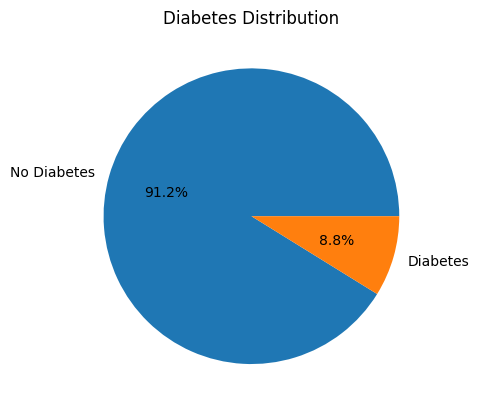

In [ ]:
fig, ax = plt.subplots()
ax.pie(diabetes_df['diabetes'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%')
ax.set_title('Diabetes Distribution')
plt.show()

In [ ]:
cat_features = diabetes_df.columns[diabetes_df.dtypes == 'object'].tolist()
num_features = diabetes_df.columns[(diabetes_df.dtypes == 'int64') | (diabetes_df.dtypes == 'float64')].tolist()

for col in cat_features:
    print(f"Unique values in {col}: {diabetes_df[col].unique()}")

Unique values in gender: ['Female' 'Male' 'Other']
Unique values in smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [ ]:
print(diabetes_df['gender'].value_counts())
diabetes_df['smoking_history'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [ ]:
diabetes_df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [ ]:
print(diabetes_df['gender'].unique())
diabetes_df["gender"].value_counts()

['Female' 'Male' 'Other']


gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [ ]:
print(diabetes_df['smoking_history'].unique())
diabetes_df["smoking_history"].value_counts()

['never' 'No Info' 'current' 'former' 'ever' 'not current']


smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [ ]:
diabetes_df["smoking_history"].value_counts().index

Index(['never', 'No Info', 'former', 'current', 'not current', 'ever'], dtype='object', name='smoking_history')

In [ ]:
def plot_distribution(column, **kwarg):
  title = kwarg["title"]
  value_counts = column.value_counts()
  fig, ax = plt.subplots()
  fig.set_size_inches(10, 6)
  if title:
    ax.set_title(title)
  ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
  plt.show()

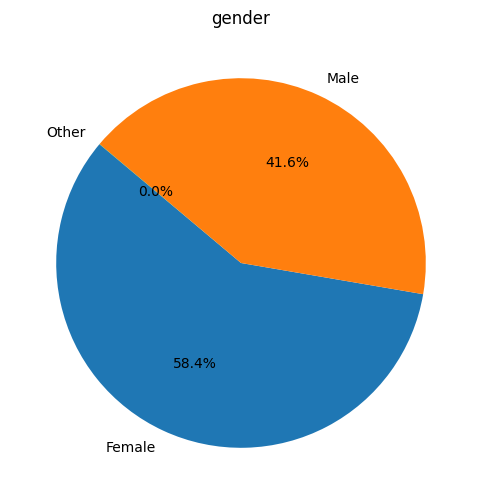

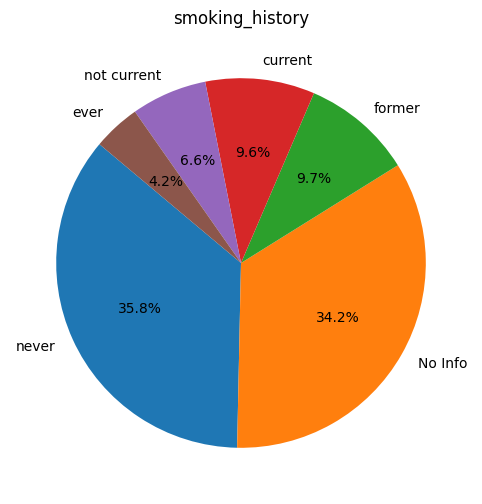

In [ ]:
for col in cat_features:
  plot_distribution(diabetes_df[col], title=col)

In [ ]:
len(diabetes_df[(diabetes_df["gender"]=="Other") & (diabetes_df["diabetes"] == 1)])

0

In [ ]:
def drop_rows_with_other_gender(df):
  rows_to_drop = df[(df["gender"] == "Other") & (df["diabetes"] == 1)].index
  df = df.drop(rows_to_drop)
  return df

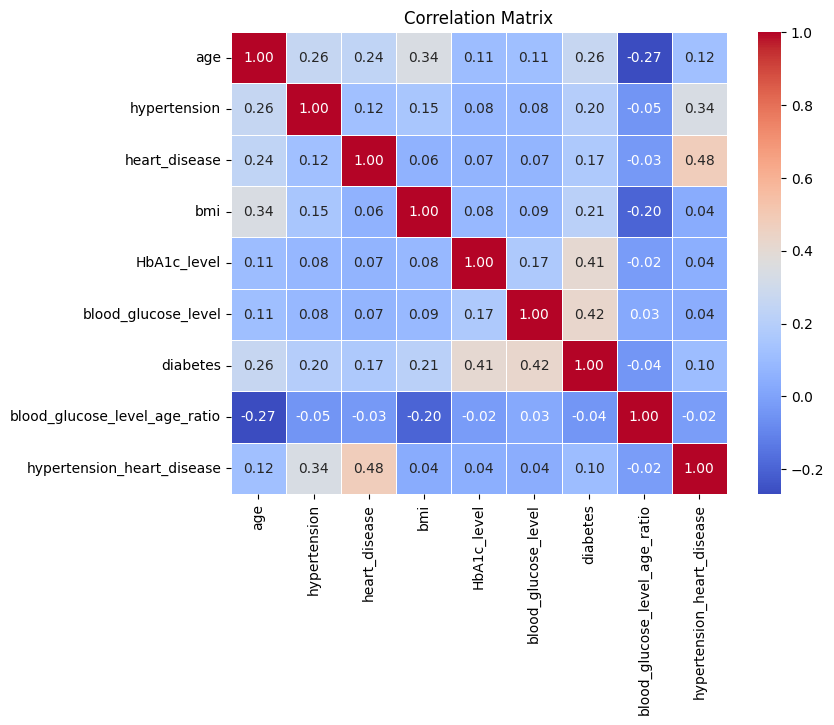

In [ ]:
#correlation matrix of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = diabetes_df[num_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
Y_all = diabetes_df["diabetes"]
X_all = diabetes_df.drop("diabetes", axis=1)

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)

In [ ]:
## encoding categorical variables
encoder = None
scaler = None
for col in cat_features:
  encoder ={}
  le = LabelEncoder()
  X_train[col] = le.fit_transform(X_train[col])
  X_eval[col] = le.transform(X_eval[col])
  encoder[col] = le

  print(f"Unique values in {col}: {diabetes_df[col].unique()}")

In [ ]:
!pip install ydata-synthetic --quiet

In [ ]:
# solving unbalanced dataset problem with smote using ydata_synthetic.synthesizers
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import RegularSynthesizer

#Synthesize the minority class
training_df = diabetes_df.loc[diabetes_df['diabetes'] == 1].copy()
training_df.drop('diabetes', axis=1)
training_df

In [ ]:
ctgan_args = ModelParameters(batch_size=500, lr=5e-4, betas=(0.5, 0.9), noise_dim=32, layers_dim=128)
train_args = TrainParameters(epochs=40)

# Train the generator model
synth = RegularSynthesizer(modelname='ctgan', model_parameters=ctgan_args)
synth.fit(data=training_df, train_arguments=train_args, num_cols=num_features, cat_cols=['diabetes'])


In [ ]:
synth_data = synth.sample(67000)

In [ ]:
synth_data['diabetes'] = 1
synth_data.head()

In [ ]:
combined_data = pd.concat([diabetes_df, synth_data], ignore_index=True)
combined_data.info()

In [ ]:
Y_all = combined_data["diabetes"]
X_all = combined_data.drop("diabetes", axis=1)

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_eval.shape

((76916, 11), (19230, 11))

In [ ]:
# def check_balance(col):
#   print(f"{col} value count diabetes_df:", diabetes_df[col].value_counts())
#   print(f"{col} value count X_train:", X_train[col].value_counts())
#   print(f"{col} value count X_eval:", X_eval[col].value_counts())

In [ ]:
check_balance("smoking_history")
print("............................................")
check_balance("gender")

smoking_history value count diabetes_df: smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64
smoking_history value count X_train: smoking_history
never          27451
No Info        26376
former          7438
current         7371
not current     5055
ever            3225
Name: count, dtype: int64
smoking_history value count X_eval: smoking_history
never          6947
No Info        6511
former         1861
current        1826
not current    1312
ever            773
Name: count, dtype: int64
............................................
gender value count diabetes_df: gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64
gender value count X_train: gender
Female    44967
Male      31933
Other        16
Name: count, dtype: int64
gender value count X_eval: gender
Female    11194
Male       8034
Other         2
Name: count, dtype: int64


In [ ]:
# def check_target_balance():
#   print("y all:", Y_all.value_counts())
#   print("y train:", y_train.value_counts())
#   print("y eval:", y_eval.value_counts())


In [ ]:
# # solving unbalanced dataset problem with smote
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# check_target_balance()

In [ ]:
X_all.shape

(96146, 11)

In [ ]:
##standardizing numerical variabes
from sklearn.preprocessing import StandardScaler
num_cols = [col for col in num_features if col !='diabetes']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_eval[num_cols] = scaler.transform(X_eval[num_cols])

In [ ]:
X_train.head()

,gender,smoking_history,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_glucose_level_interaction,blood_glucose_level_age_ratio,hypertension_heart_disease
46612,0,0,-0.301980,-0.288976,-0.20548,0.624051,0.994649,0.412328,8,-0.123659,-0.096111
31612,0,0,-1.842405,-0.288976,-0.20548,-1.789284,-1.428149,-0.198580,5,6.242949,-0.096111
96143,0,2,0.811043,-0.288976,-0.20548,-0.945946,0.901465,-0.931669,39,-0.178511,-0.096111
95691,1,4,1.078169,-0.288976,-0.20548,-0.037623,0.435542,-0.198580,77,-0.172492,-0.096111
37658,1,5,0.276792,-0.288976,-0.20548,-0.480707,-0.682673,0.167965,97,-0.151617,-0.096111


In [ ]:
#i need to download the LabelEncoder and standardscaler used
import pickle
with open("encoder.pkl", "wb") as f:
  pickle.dump(encoder, f)

with open("scaler.pkl", "wb") as f:
  pickle.dump(scaler, f)

In [ ]:
X_train.shape, X_eval.shape

((76916, 11), (19230, 11))

In [ ]:
###preparing base models

##A keras model neural net

from keras.src.backend import dropout
from keras.src.engine import input_layer
from keras.optimizers import Adam
from pandas.core.arrays import categorical

## the one where i build the first model iteration:

from keras.layers import Input, Embedding, Concatenate, Dense, Flatten, Dropout, LeakyReLU
from keras.models import Model

In [ ]:
def create_keras_model():
  input_layers = []
  input_tensors = []
  numerical_input_layer = Input(shape=(len(num_cols),))



  embedding_size =  16
  for col in cat_features:
    cat_input_layer =Input(shape=(1,), name=col)
    x = Embedding(input_dim=diabetes_df[col].nunique(), output_dim=embedding_size)(cat_input_layer)
    x = Flatten()(x)
    input_layers.append(x)
    input_tensors.append(cat_input_layer)

  input_layers.append(numerical_input_layer)
  input_tensors.append(numerical_input_layer)
  input_layer = Concatenate()(input_layers)
  x = Dense(64, activation='relu')(input_layer)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(32, activation='relu')(x)
  x = Dropout(0.1)(x)
  output_layer = Dense(1, activation='sigmoid')(x)
  model = Model(input_tensors, output_layer)
  model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = create_keras_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 gender (InputLayer)         [(None, 1)]                  0         []                            
                                                                                                  
 smoking_history (InputLaye  [(None, 1)]                  0         []                            
 r)                                                                                               
                                                                                                  
 smoking_history_glucose_le  [(None, 1)]                  0         []                            
 vel_interaction (InputLaye                                                                       
 r)                                                                                           

In [ ]:
from keras.callbacks import Callback
import os

class DynamicModelCheckpoint(Callback):
    def __init__(self, filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1):
        super().__init__()
        self.filepath = filepath
        self.monitor = monitor
        self.save_best_only = save_best_only
        self.mode = mode
        self.verbose = verbose
        self.best_val_accuracy = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get(self.monitor)
        if current_val_accuracy is None:
            return

        if (self.save_best_only and
            ((self.mode == 'max' and current_val_accuracy > self.best_val_accuracy) or
             (self.mode == 'min' and current_val_accuracy < self.best_val_accuracy))):
            self.best_val_accuracy = current_val_accuracy
            if self.verbose > 0:
                print(f"\nEpoch {epoch + 1}: Validation {self.monitor}: {current_val_accuracy:.4f} (improved)")

            # Change the filepath based on the validation accuracy
            self.filepath = f"model_{current_val_accuracy:.4f}.h5"
            self.model.save_weights(self.filepath, overwrite=True)
        elif not self.save_best_only:
            if self.verbose > 0:
                print(f"\nEpoch {epoch + 1}: Validation {self.monitor}: {current_val_accuracy:.4f}")





In [ ]:
checkpoint = DynamicModelCheckpoint(filepath="model_checkpoint.h5", monitor='val_accuracy', save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
X_train_cat = [X_train[col].values for col in cat_features]
X_train_num = X_train[num_cols].values
X_eval_cat = [X_eval[col].values for col in cat_features]
X_eval_num = X_eval[num_cols].values

# Fit the model
model.fit(
    X_train_cat + [X_train_num],
    y_train,
    epochs=10,
    batch_size=32,
    callbacks=callbacks_list,
    validation_data=(X_eval_cat + [X_eval_num], y_eval)
)

Epoch 1/10
2404/2404 [==============================] - ETA: 0s - loss: 0.1080 - accuracy: 0.9628
Epoch 1: Validation val_accuracy: 0.9672 (improved)
2404/2404 [==============================] - 11s 3ms/step - loss: 0.1080 - accuracy: 0.9628 - val_loss: 0.0892 - val_accuracy: 0.9672
Epoch 2/10
2391/2404 [============================>.] - ETA: 0s - loss: 0.0879 - accuracy: 0.9686
Epoch 2: Validation val_accuracy: 0.9689 (improved)
2404/2404 [==============================] - 9s 4ms/step - loss: 0.0878 - accuracy: 0.9686 - val_loss: 0.0870 - val_accuracy: 0.9689
Epoch 3/10
2403/2404 [============================>.] - ETA: 0s - loss: 0.0859 - accuracy: 0.9693
Epoch 3: Validation val_accuracy: 0.9690 (improved)
2404/2404 [==============================] - 10s 4ms/step - loss: 0.0858 - accuracy: 0.9693 - val_loss: 0.0868 - val_accuracy: 0.9690
Epoch 4/10
2386/2404 [============================>.] - ETA: 0s - loss: 0.0840 - accuracy: 0.9697
Epoch 4: Validation val_accuracy: 0.9703 (improved)

In [ ]:
y_pred_probs = model.predict(X_eval_cat + [X_eval_num])
y_pred = (y_pred_probs > 0.5).astype("int32")

601/601 [==============================] - 1s 2ms/step


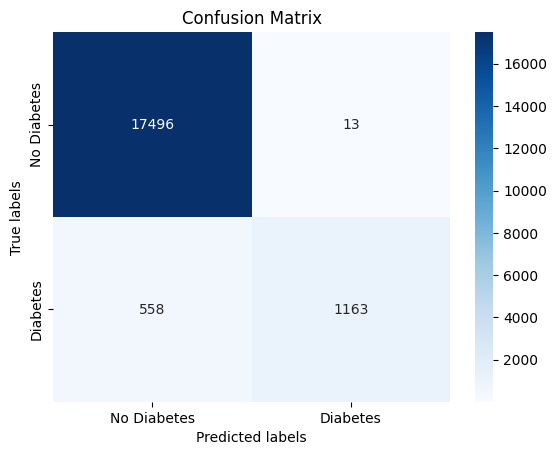

In [ ]:
# confusion matrix to debug my model better
from sklearn.metrics import confusion_matrix,precision_score, recall_score, classification_report
import seaborn as sns

class_names = ['No Diabetes', 'Diabetes']
cm = confusion_matrix(y_eval, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.99      0.68      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [ ]:
precision = precision_score(y_eval, y_pred)
recall = recall_score(y_eval, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9889455782312925
Recall: 0.6757699012202208
